# Inference and Hypothesis testing


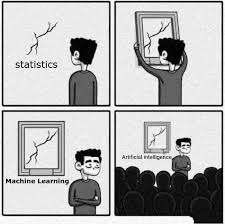



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inferential-Statistics" data-toc-modified-id="Inferential-Statistics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inferential Statistics</a></span><ul class="toc-item"><li><span><a href="#Sampling-distributions" data-toc-modified-id="Sampling-distributions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sampling distributions</a></span><ul class="toc-item"><li><span><a href="#Standard-Error" data-toc-modified-id="Standard-Error-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Standard Error</a></span></li><li><span><a href="#Confidence-interval" data-toc-modified-id="Confidence-interval-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Confidence interval</a></span></li></ul></li><li><span><a href="#The-central-limit-Theorem" data-toc-modified-id="The-central-limit-Theorem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The central limit Theorem</a></span></li><li><span><a href="#The-Bootstrap" data-toc-modified-id="The-Bootstrap-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>The Bootstrap</a></span></li></ul></li><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#Is-this-coin-fair?" data-toc-modified-id="Is-this-coin-fair?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Is this coin fair?</a></span></li><li><span><a href="#Were-older-people-more-in-favour-of-Brexit?" data-toc-modified-id="Were-older-people-more-in-favour-of-Brexit?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Were older people more in favour of Brexit?</a></span></li><li><span><a href="#t-test" data-toc-modified-id="t-test-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>t-test</a></span></li><li><span><a href="#Is-my-data-Normal?" data-toc-modified-id="Is-my-data-Normal?-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Is my data Normal?</a></span></li></ul></li><li><span><a href="#ANOVA" data-toc-modified-id="ANOVA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ANOVA</a></span><ul class="toc-item"><li><span><a href="#Permutation-test-approach" data-toc-modified-id="Permutation-test-approach-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Permutation test approach</a></span></li><li><span><a href="#F-test-Approach" data-toc-modified-id="F-test-Approach-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>F-test Approach</a></span></li></ul></li><li><span><a href="#p-hacking" data-toc-modified-id="p-hacking-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>p-hacking</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#References-&amp;-further-materials" data-toc-modified-id="References-&amp;-further-materials-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References &amp; further materials</a></span></li></ul></div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import pandas as pd
np.random.seed(123)

# Let us welcome SciPy!
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, beta

## Inferential Statistics

In real life situations we only have access to samples of data, not to the entire population. Then, how can we draw conclussions about the underlying population as a whole? How confident can we be with this conclusions? The answer lies in the *Inferential Statistics*

### Sampling distributions

Imagine the "real" distribution of salaries in Spain is as follows: 

In [2]:
population_mean = 23646.50
population_std = 5000
population = 10000
mock_salaries = np.random.normal(population_mean, population_std, population)

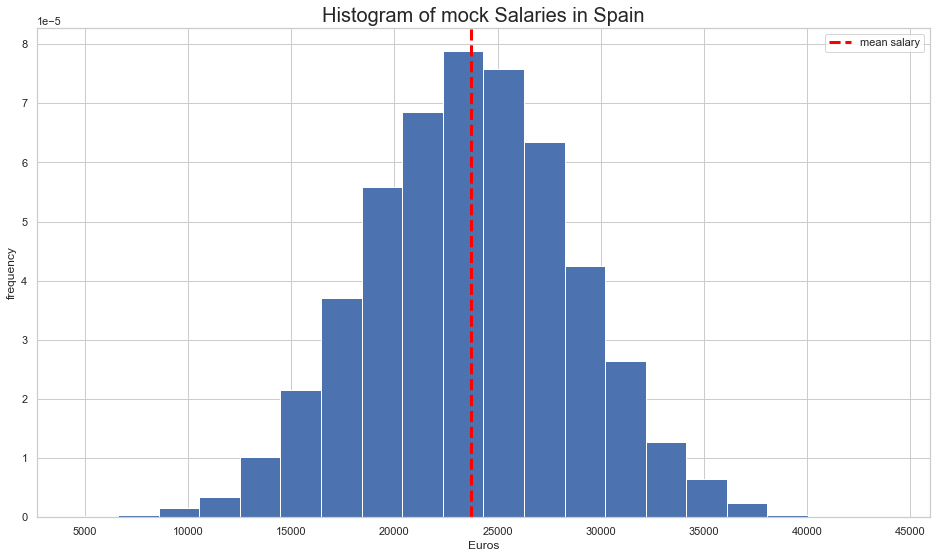

In [4]:
plt.hist(mock_salaries, bins=20, density=True)
plt.axvline(np.mean(mock_salaries),
            c="red",
            linewidth= 3.,
            linestyle='--',
            label='mean salary') # plot the mean
plt.title('Histogram of mock Salaries in Spain', size=20)
plt.xlabel('Euros')
plt.ylabel('frequency')
plt.legend()
plt.show()

What if you had to *infer* the mean salary based on a sample?

In [16]:
sample_size = 15
sample = np.random.normal(population_mean, population_std, sample_size)

In [17]:
sample

array([24627.46697312, 26147.91307548, 35187.16358151, 27047.48068343,
       26102.3371862 , 22221.06447331, 22055.20089329, 22785.76740423,
       29509.14109356, 26474.0193431 , 18659.1790732 , 30142.4734331 ,
       33736.86175361, 31045.59175903, 26633.44066452])

In [18]:
print(f'Sample mean: {np.round(np.mean(sample))}, ', 
      f'Sample std: {np.round(np.std(sample))}')

Sample mean: 26825.0,  Sample std: 4372.0


Repeating this over and over would give us the **sampling distribution** (of the mean, in this case). With that, we can hace an idea of how good our estimate is.

**Exercise**
* Write a piece of code that draws 1000 samples of size 15 from the population of salaries.
* Record the average of each sample in a list
* Plot the distribution of the averages
* What is the average of the averages?

In [77]:
# Your code here
list_of_samples = [np.mean(np.random.normal(population_mean, population_std, sample_size)) for _ in range(1000)]

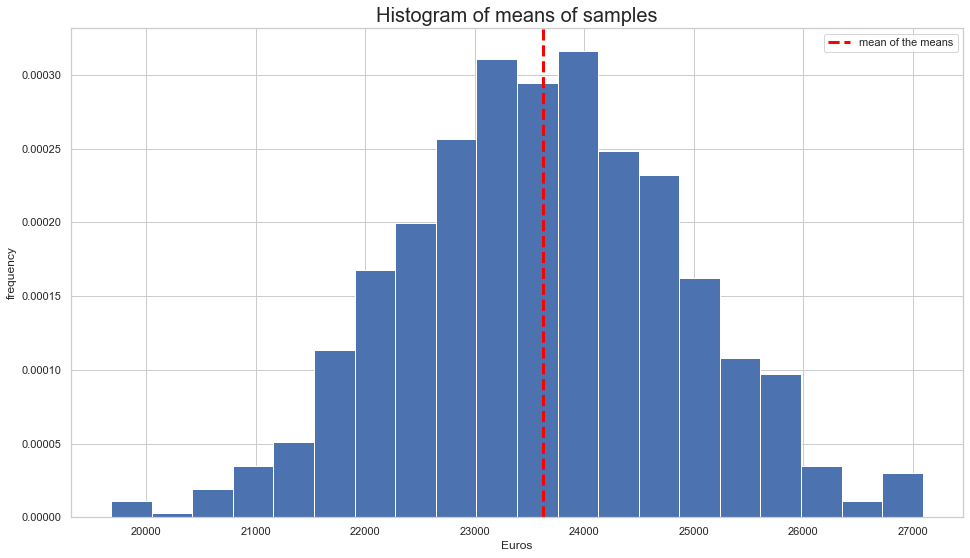

In [78]:
plt.hist(list_of_samples, bins=20, density=True)
plt.axvline(np.mean(list_of_samples),
            c="red",
            linewidth= 3.,
            linestyle='--',
            label='mean of the means') # plot the mean
plt.title('Histogram of means of samples', size=20)
plt.xlabel('Euros')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [79]:
print(f'The MEAN OF THE SAMPLING DISTRIBUTION is: {np.mean(list_of_samples)}')
print(f'The real mean of the population is: {np.mean(mock_salaries)}')

The MEAN OF THE SAMPLING DISTRIBUTION is: 23625.65677079915
The real mean of the population is: 23695.05946145798


#### Standard Error

In [80]:
print(f'The STANDARD ERROR of the sampling distribution is: {np.std(list_of_samples)}')

The STANDARD ERROR of the sampling distribution is: 1265.803836095125


The theory stablishes that:

$$SE = \hat\sigma /\sqrt{n} $$


In [81]:
# Exactly in the limit
std_error_of_mean = population_std / np.sqrt(sample_size)
std_error_of_mean

1290.9944487358057

In [82]:
# Approximate in practice
empirical_standard_error = np.std(sample) / np.sqrt(sample_size)
empirical_standard_error

1091.3693689865138

#### Confidence interval


It is  a range that includes a given fraction of the sampling distribution. Typicall values are 90%, 95%, and 99%. This proposes a range of plausible values for an unknown parameter (for example, the mean). 

The interval has an associated confidence level.  The confidence level represents the frequency (i.e. the proportion) of confidence intervals that contain the true value of the unknown population parameter across many independent experiments. 


**Remember:** 95% confidence interval does not mean 95% probability. (Bayesian confidence intervals can be interpreted that way though)

Taken mostly from [Wikipedia](https://en.wikipedia.org/wiki/Confidence_interval).
See also this blog from [Towardsdatascience](https://towardsdatascience.com/a-complete-guide-to-confidence-interval-and-examples-in-python-ff417c5cb593).

See [this section from Wikipedia](https://en.wikipedia.org/wiki/Confidence_interval#Basic_steps) to get the basic steps:





The theory stablishes that the 95% CI can be obtained as:

$$\left[ \hat\mu -1.96 * SE, \hat\mu +1.96 * SE \right]$$


Other typical two sided confidence levels are obtained by changing the 1.96 factor by another ones:

|  CI |  z* |
|---|---|
| 99%  | 2.576  | 
|  98% |  2.326 |   
|   95%|   1.96|
|90% |1.645|

In [83]:
# Exactly in the limit
np.percentile(list_of_samples,[2.5,97.5])

array([21196.19379438, 26070.64165032])

In [85]:
# Approximate in practice
np.mean(sample) - 1.96*(empirical_standard_error), np.mean(sample) + 1.96*(empirical_standard_error)

(24150.86073997426, 28429.0286664014)

**Exercise**

Imagine you want to know the success rate of calling a client to sign up for your product. You have called 100 individuals and 10 of them did sign up.

For every individual signing up you make 10 euros. Every call costs you 0.4 euros.



Hint: the confidence interval for a proportion is similar than for the mean, but using this formula for the standard error:

$$SE = \sqrt{\hat{p}(1-\hat{p})/n} $$

where $\hat{p}$ is the empirical fraction of success cases and $n$ is the number of trials

In [47]:
# Exercise test a proportion
succeed_rate = 0.1
sample_size = 100
cost_per_call = 0.4
earning_per_succed = 10

In [40]:
SE = np.sqrt((succeed_rate*(1- succeed_rate )) / (sample_size))

CI = succeed_rate - 1.96*SE, succeed_rate + 1.96*SE

In [49]:
# Success rate in the 'worst' case scenario
CI[1]

0.1678963916567

In [43]:
# Expected earnings per call in the worst case scenario
expected_earning_worst_case = CI[0] * earning_per_succed

In [44]:
expected_earning_worst_case

0.32103608343300016

In [45]:
# Expected benefit per call worst case
expected_benefit_per_call = expected_earning_worst_case - cost_per_call

In [46]:
# Expected earnings per call in the worst case scenario > cost per call

if expected_benefit_per_call > 0:
    print(f'GO ON!: keeping calling can provide an estimate benefit of {np.round(expected_benefit_per_call,3)} '
          'per call')
else:
    print(f'ABORT!: keeping calling can provide an estimate loss of {np.round(expected_benefit_per_call,3)} '
          'per call')

ABORT!: keeping calling can provide an estimate loss of -0.079 per call


It is important to remember that confidence intervals and standard errors
only quantify sampling error; that is, error due to measuring only part of the
population. The sampling distribution does not account for other sources of
error, notably **sampling bias** and **measurement error**. (From [Think Stats](http://greenteapress.com/thinkstats2/thinkstats2.pdf))

**NOTE**: Read this blog from [Towardsdatascience](https://towardsdatascience.com/a-complete-guide-to-confidence-interval-and-examples-in-python-ff417c5cb593) to know how to calculate CI for other statistics.

### The central limit Theorem

Code snnipet extracted from [Geeks for Geeks](https://www.geeksforgeeks.org/python-central-limit-theorem/#:~:text=The%20definition%3A,from%20which%20we%20are%20sampling.&text=The%20distribution%20of%20the%20sample,as%20the%20sample%20size%20increases.)

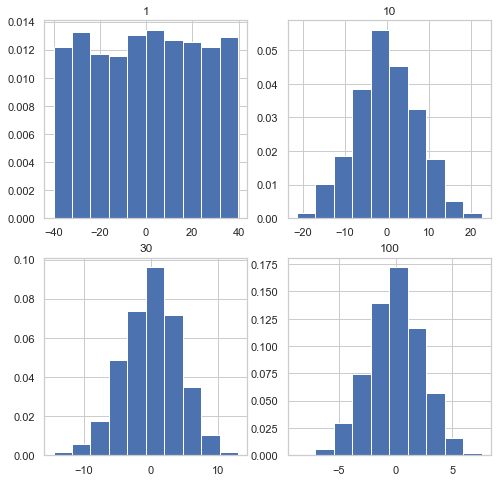

In [160]:
# number of sample 
num = [1, 10, 30, 100]   
# list of sample means 
means = []   
  
# Generating 1, 10, 30, 100 random numbers from -40 to 40 
# taking their mean and appending it to list means. 
for j in num: 
    # Generating seed so that we can get same result  
    # every time the loop is run... 
    np.random.seed(1) 
    x = [np.mean(np.random.uniform(-40, 40, j)) for _i in range(1000)] 
    means.append(x) 

k = 0
# plotting all the means in one figure 
fig, ax = plt.subplots(2, 2, figsize =(8, 8)) 
for i in range(0, 2): 
    for j in range(0, 2): 
        # Histogram for each x stored in means 
        ax[i, j].hist(means[k], 10, density = True) 
        ax[i, j].set_title(label = num[k]) 
        k = k + 1

**Central Limit Theorem (CLT)**


Let $X_1,...,X_n$ be a random sample from a distribution with mean $\mu$ and variance $\sigma^2$. Define
$$\bar{X} = \frac{1}{n} \sum_i x_i.$$

The CLT states that as $n$ goes to infinity that
$$\bar{X} \sim \mbox{N}(\mu,\sigma^2/n).$$

Or, put it in simpler words: **regardless of the shape of
the population distribution** of $X$, as the sample size $n$ gets larger,
the sampling distribution of $\bar{X}$ becomes increasingly closer to
normal, with mean $\mu$ and variance $\sigma^2 / n$. (As long as $\mu$ and $\sigma$ are finite quantities.)


### The Bootstrap

In real life we can not recreate the sampling distribution... we can infer the values of some statistics with tricks as the ones described above and the CTL. But: can we do something more general for *any* statistic?

In [161]:
skewed_distribution = np.random.beta(2,8,1000)

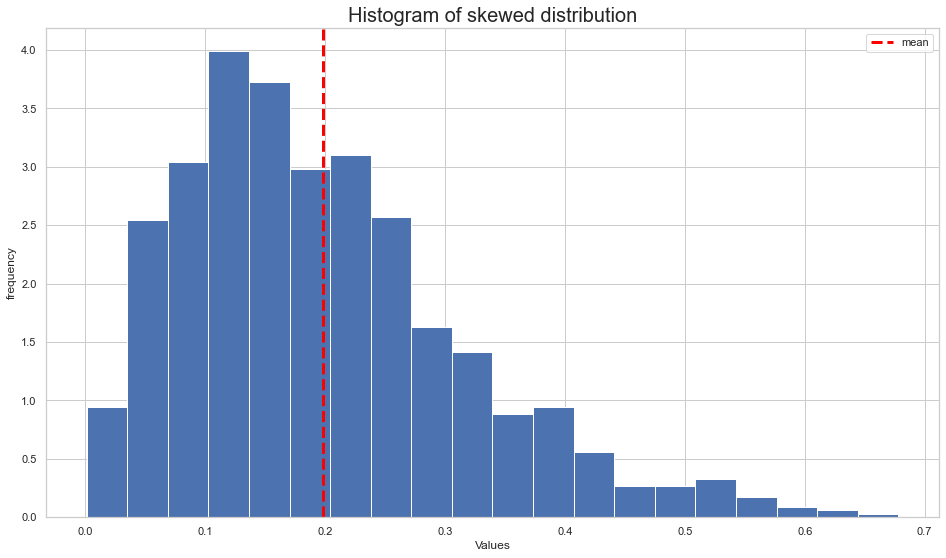

In [162]:
plt.hist(skewed_distribution, bins=20, density=True)
plt.axvline(np.mean(skewed_distribution),
            c="red",
            linewidth= 3.,
            linestyle='--',
            label='mean') # plot the mean
plt.title('Histogram of skewed distribution', size=20)
plt.xlabel('Values')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [51]:
# take a sample of 50 values
sample_size = 50
sample = np.random.beta(2,8, sample_size)

In [52]:
# using the CLT
estimate_mean = np.mean(sample)
estandard_error = np.std(sample)
CI = estimate_mean - 1.96*estandard_error / np.sqrt(sample_size), estimate_mean + 1.96*estandard_error / np.sqrt(sample_size)
print(f' Estimate of the mean: {np.round(estimate_mean, 2)}')
print(f' 95% CI of the mean: {np.round(CI[0], 2), np.round(CI[1], 2)}')
    

 Estimate of the mean: 0.19
 95% CI of the mean: (0.16, 0.22)


In [53]:
np.mean(sample)

0.18798330392139817

Using bootstrapping consits on recreating a *fake* sampling distribution by solely having one sample! Let's use this to calculate in a different way the above estimation for the mean and its CI.

1. Take values *with replacement* from your original sample until you get a new *bootstrapped* sample with the same size as the original.

In [54]:
bootsrapped_sample = np.random.choice(sample, sample_size)
bootsrapped_sample

array([0.04103365, 0.21905865, 0.02472893, 0.11663096, 0.25666956,
       0.03201482, 0.30524049, 0.16615223, 0.04103365, 0.52266972,
       0.07420157, 0.29459197, 0.30524049, 0.22781885, 0.29459197,
       0.09101912, 0.04103365, 0.52266972, 0.1072004 , 0.04103365,
       0.41248822, 0.10172743, 0.11663096, 0.41248822, 0.11663096,
       0.41248822, 0.12824516, 0.37313476, 0.04103365, 0.12824516,
       0.03201482, 0.01561049, 0.37313476, 0.11588904, 0.06346374,
       0.21905865, 0.35279419, 0.22781885, 0.2363137 , 0.11663096,
       0.21505191, 0.08043526, 0.07420157, 0.1072004 , 0.07420157,
       0.2051903 , 0.17817076, 0.10790892, 0.02472893, 0.05877278])

2. Calculate the statistic you want to compute with this new sample

In [55]:
np.mean(bootsrapped_sample)

0.176926767507323

3. Repeat the process enough (10000) times so that you create a distribution of you statistic.

In [56]:
bootstrapped_sampling_distribution = [np.mean(np.random.choice(sample, sample_size)) for _ in range(10000) ]

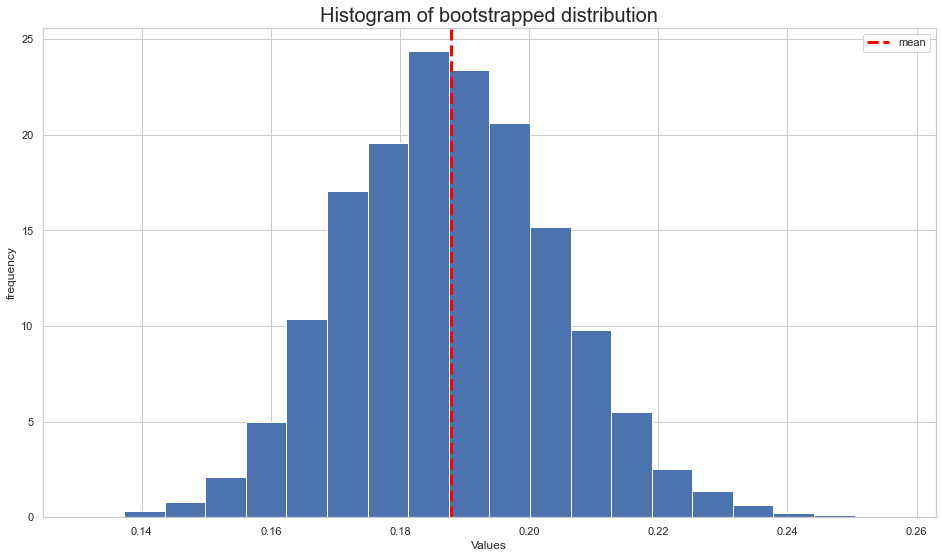

In [57]:
plt.hist(bootstrapped_sampling_distribution, bins=20, density=True)
plt.axvline(np.mean(bootstrapped_sampling_distribution),
            c="red",
            linewidth= 3.,
            linestyle='--',
            label='mean') # plot the mean
plt.title('Histogram of bootstrapped distribution', size=20)
plt.xlabel('Values')
plt.ylabel('frequency')
plt.legend()
plt.show()

4. Get the estimate and its CI 

In [58]:
mean = np.mean(bootstrapped_sampling_distribution)
CI = np.percentile(bootstrapped_sampling_distribution,[2.5,97.5])
print(f' Bootstrapped estimate of the mean: {np.round(mean, 2)}')
print(f' Bootstrapped 95% CI of the estimate: {np.round(CI[0], 3), np.round(CI[1], 3)}')

 Bootstrapped estimate of the mean: 0.19
 Bootstrapped 95% CI of the estimate: (0.157, 0.221)


**Exercise**
Use the bootstrap method to estimate the Median of the distribution above and its 90% confidence interval.

In [24]:
# your code here

**Note** Some [libraries in Python](https://github.com/cgevans/scikits-bootstrap) implement more sophisticated versions of Bootstrapping, but the idea is as simple and powerful as it looks like!

## Hypothesis testing

Adapted from [Think Stats](http://greenteapress.com/thinkstats2/thinkstats2.pdf):


The goal of classical hypothesis testing is to answer the question, “Given a
sample and an apparent effect, what is the probability of seeing such an effect
by chance?” Here’s how we answer that question:


* The first step is to quantify the size of the apparent effect by choosing a **test statistic**. 
* The second step is to define a **null hypothesis**, which is a model of the system based on the assumption that the apparent effect is not real (i.e that it can be due to chance).
* The third step is to compute a **p-value**, which is the probability of seeing the apparent effect if the null hypothesis is true.

* The last step is to interpret the result. If the p-value is low, the effectis said to be **statistically significant**, which means that it is unlikely to have occurred by chance. In that case we infer that the effect is more likely to appear in the larger population.

The logic of this process is similar to a proof by contradiction. To prove a mathematical statement, $A$, you assume temporarily that $A$ is false. If that assumption leads to a contradiction, you conclude that $A$ must actually be
true. Similarly, to test a hypothesis like, “This effect is real,” we assume, temporarily, that it is not. That’s the null hypothesis.
***

### Is this coin fair?

We toss a coin 250 times and see 140 heads and 110 tails...  
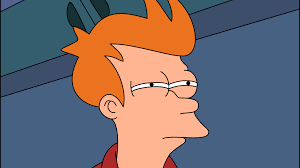


* **Null hypothesis**: The coin is fair. ($P(\text heads)=0.5$)
* **Alternative Hypothesis**: The coin is biased towards $heads$ (i.e. $p(heads) > 0.5$)

In [204]:
from collections import Counter

more_than_140_head = 0
num_experiments = 10000

for _ in range(num_experiments):
    experiment = np.random.choice(['heads', 'tails'], 250)
    num_heads = Counter(experiment)['heads']
    more_than_140_head += 1 if (num_heads >= 140) else 0
    
print(f'We have observed {more_than_140_head} in {num_experiments} trials')
print('The probability (p_value) of finding such a extreme result with a fair '
      f'coin is {(more_than_140_head)/(num_experiments)}')

We have observed 313 in 10000 trials
The probability (p_value) of finding such a extreme result with a faircoin is 0.0313


Typically 0.01, 0.05, 0.1 are significant values.

Beware that you can still be wrong in your decision!! In fact, the errors you can make in hypothesis testing have names:

|                       | In Fact H0 is True | In Fact H0 is False | 
|-----------------------|--------------------|---------------------|
| Test Decides H0 True  | Great!             | Type II Error       | 
| Test Decides H0 False | Type I Error       | Great!              |
|                       |                    |                     | 


Relatedly, you will hear the term `statistical power` referring to $$\text{power}=\Pr{\big (}{\text{reject }}H_{0}\mid H_{1}{\text{ is true}}{\big )}$$

(It indicates the probability of avoiding a type II error). See also: https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/

In this case, we did not need to simulate because we know that the number of `heads` (success cases) when tossing a coin follows a `binomial distribution` 

Scipy version: `binomial test`

In [203]:
from scipy.stats import binom_test
p_value = binom_test(x=140, n=250, p=0.5, alternative='greater')

print('The probability (p_value) of finding a result as extreme (140 vs 110) '
      f'with a fair coing is: {np.round(p_value, 3)}')  

The probability (p_value) of finding a result as extreme (140 vs 110) with a fair coing is: 0.033


### Were older people more in favour of Brexit?

Adapted from [here](https://matthew-brett.github.io/les-pilot/brexit_ages.html)

Every year, the Hansard Society sponsors a survey on political engagement in the UK. They put topical questions in each survey. For the 2016 / 17 survey, they asked about how people voted in the Brexit referendum.


In [61]:
remain_leave = pd.read_csv('../data/remain_leave.csv')
remainers = remain_leave[remain_leave['brexit'] == 1]
brexiteers = remain_leave[remain_leave['brexit'] == 2]

In [62]:
remain_leave.groupby('brexit').count()

,age
brexit,
1,774
2,541


In [63]:
remainers.age.mean()

48.01550387596899

In [64]:
brexiteers.age.mean()

51.715341959334566

In [65]:
brexiteers.age.mean() - remainers.age.mean()

3.6998380833655773

* **Null Hypothesis** The difference in means is due to chance
* **Alternative Hyothesis** It is not due to chance


In [69]:
# Keep track of the sizes of each group
number_groupA = remainers.shape[0]
number_groupB = brexiteers.shape[0]

# Shuffle the population
population = remain_leave.age.copy() 
np.random.shuffle(population)

# Select new (random) GroupA and GroupB
groupA = population[:number_groupA]
groupB = population[number_groupA:]
np.mean(groupB) - np.mean(groupA)
                                

-0.44237391757058475

In [73]:
# Repeat the above procedure N times and see 
# how likely you observe a difference as in the real data
reference_difference = brexiteers.age.mean() - remainers.age.mean()

mean_greater_than_reference = 0
num_experiments = 10000
for _ in range(num_experiments):
    # Shuffle the population
    np.random.shuffle(population)

    # Select new (random) GroupA and GroupB, and mean difference for this experiment
    groupA = population[:number_groupA]
    groupB = population[number_groupA:]
    exp_difference = np.mean(groupB) - np.mean(groupA)
    mean_greater_than_reference += 1 if (exp_difference >= reference_difference) else 0

    
print('The probability (p_value) of finding a mean difference as extreme (~3 years) by chance is'
      f': {np.round(mean_greater_than_reference/num_experiments, 4)}')               

The probability (p_value) of finding a mean difference as extreme (~3 years) by chance is: 0.0


In [72]:
mean_greater_than_reference

0

### t-test

[Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test)

If we assume a number of things about our underlying data, we can perform a t test. The more relevant are:


* Our observations must be independent of each other. 

* Normality of data - We assume that the sample is derived from a normally distributed data.


Notice that before computational power was available to perform resampling techniques, researchers had to be ingenious on how to test things! You can learn more about t-tests in this post from [towardsdatascience](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f).


In [232]:
from scipy.stats import ttest_ind 
_, p_value = ttest_ind(brexiteers.age, remainers.age, equal_var=True)
print(f'The probability that the two samples have the same mean is {p_value}:')

The probability that the two samples have the same mean is 0.00026335472732347975:


### Is my data Normal?

One of the great things about hypothesis testing is that once you understand the general procedure, you can simply look for the right test to perform depending on the effect you want to test --- of course, it is much better to really understand what you are doing... 

**Example**

You give your results from the t-test on Brexit ages to your Boss, but they don't buy the hypothesis that the underlying data is normally distributed... 

Let's convince them with another test!!

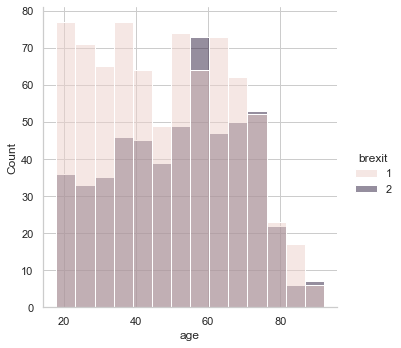

In [235]:
# it looks bad...
sns.displot(remain_leave, x='age', hue='brexit');

You find `scipy.stats.normaltest` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html). It says:

"Test whether a sample differs from a normal distribution"


* **statistic**: s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest. (OK...)
* **null hypothesis** that a sample comes from a normal distribution

Then if the **p-value** returned by the function is smaller than 0.05 (the significance level that our boss wants) we can safely reject the null hypothesis -> the data do no come from a normal distribution. 

In [243]:
from scipy.stats import normaltest
sample = brexiteers.age
_, p = normaltest(sample)
print("p = {:g}".format(p))
if p < confidence_level:  
    print("The null hypothesis can be rejected --> very unlikely to come from a normal distribution")
else:
    print("The null hypothesis cannot be rejected --> it can come from a normal distribution")

p = 1.44287e-17
The null hypothesis can be rejected --> very unlikely to come from a normal distribution


**Bonus** 

You could also try and convince your boss that the brexiteers tend to be older using [Mann-Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) and its [SciPy implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html). Can you??

## ANOVA

(Analysis of Variance)

What if we want to compare 3 or more population means??

* **Null hypothesis**: $\mu_1 = \mu_2 = \dots=\mu_n$
* **Alternative hypothesis**: at least one mean is different


Imagine you want to choose a school for your kids. You manage to get the data of the scores of the kids in 8 different schools in the A-levels. 
This is the data you have.

Does it make a difference to choose one over the other??

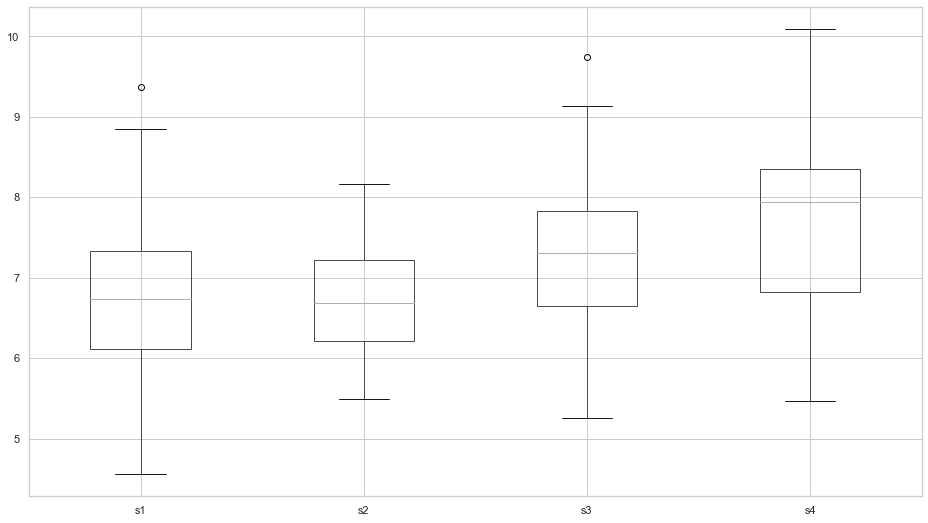

In [266]:
school_1 = np.random.normal(6.9, 1, 30 )
school_2 = np.random.normal(7.1, 1, 30 )
school_3 = np.random.normal(7.3, 1, 30 )
school_4 = np.random.normal(8., 1, 30 )

df_scores = pd.DataFrame({'s1': school_1,
              's2': school_2,
              's3': school_3,
              's4': school_4,})

df_scores.boxplot();

### Permutation test approach

* Combine all data.
* Shuffle and get four samples with sizes as the originals.
* Record the mean of each sample
* Repeat

What proportion of the times did the resampled variance exceed the observed one?? T

In [267]:
from functools import reduce
observed_variance = np.var([school_1.mean(),
                           school_2.mean(),
                           school_3.mean(),
                           school_4.mean(),])


combined_data = reduce( lambda x, y: np.append(x, y),
                       [school_1, school_2, school_3, school_4])

variance_greater_than_reference = 0
num_experiments = 1000
for _ in range(num_experiments):
    # Shuffle the population
    np.random.shuffle(combined_data)
    
    # Select new (random) groups
    groupA = np.mean(combined_data[:30])
    groupB = np.mean(combined_data[30: 60])
    groupC = np.mean(combined_data[60: 90])
    groupD = np.mean(combined_data[90: 120])
    
    # Variance in the particular experiment
    exp_variance = np.var([groupA, groupB, groupC, groupD])
    variance_greater_than_reference += 1 if (exp_variance >= observed_variance) else 0

print('The probability (p_value) of finding a variance (by chance) higher than the observed is'
      f': {np.round(variance_greater_than_reference/num_experiments, 5)}') 

The probability (p_value) of finding a variance (by chance) higher than the observed is: 0.001


In [268]:
variance_greater_than_reference

1

### F-test Approach

Similar to the t-test for comparing means, there is also a good ald fashion statistic test for ANOVA. See also: https://reneshbedre.github.io/blog/anova.html

In [270]:
# stats f_oneway functions takes the groups as input and returns F and P-value
from scipy.stats import f_oneway
fvalue, pvalue = f_oneway(school_1, 
                          school_2,
                          school_3,
                          school_4)
print(fvalue, pvalue)

5.661066884407529 0.0011794706719808383


## p-hacking

https://www.youtube.com/watch?v=HDCOUXE3HMM

## Summary 

**Topics**



**Students feedback**



## References & further materials


* [Think Stats](https://greenteapress.com/wp/think-stats-2e/)
* [Practical Statistics for Data Scientists](https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/)
* [Online Statistics Book](http://onlinestatbook.com/2/sampling_distributions/sampling_distributions.pdf)